In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\train.csv")

In [6]:
df['Cabin']=df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1,C


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [10]:
from sklearn.impute import KNNImputer

In [11]:
k=KNNImputer(n_neighbors=3)
df['Age']=k.fit_transform(df[['Age']])

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1,C


In [13]:
df=df.dropna()

In [14]:
df.shape

(889, 12)

In [16]:
def name(x):
    return " ".join([v.strip(",()[].\"'") for v in x.split(" ")])
    
def t_num(x):
    return x.split(" ")[-1]
        
def t_item(x):
    items = x.split(" ")
    if len(items) == 1:
        return "NONE"
    return "_".join(items[0:-1])

In [19]:
def pre(df):
    d=df.copy()
    d['Name']=d['Name'].apply(name)
    d['T_No']=d['Ticket'].apply(t_num)
    d['T_item']=d['Ticket'].apply(t_item)
    return d

In [20]:
df_new=pre(df)

In [21]:
df_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,T_No,T_item
0,1,0,3,Braund Mr Owen Harris,male,22.000000,1,0,A/5 21171,7.2500,0,S,21171,A/5
1,2,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.000000,1,0,PC 17599,71.2833,1,C,17599,PC
2,3,1,3,Heikkinen Miss Laina,female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S,3101282,STON/O2.
3,4,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.000000,1,0,113803,53.1000,1,S,113803,NONE
4,5,0,3,Allen Mr William Henry,male,35.000000,0,0,373450,8.0500,0,S,373450,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila Rev Juozas,male,27.000000,0,0,211536,13.0000,0,S,211536,NONE
887,888,1,1,Graham Miss Margaret Edith,female,19.000000,0,0,112053,30.0000,1,S,112053,NONE
888,889,0,3,Johnston Miss Catherine Helen Carrie,female,29.699118,1,2,W./C. 6607,23.4500,0,S,6607,W./C.
889,890,1,1,Behr Mr Karl Howell,male,26.000000,0,0,111369,30.0000,1,C,111369,NONE


In [22]:
d=df_new

In [24]:
d.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
T_No           0
T_item         0
dtype: int64

In [26]:
len(d[d['T_item']=='NONE'])

663

In [28]:
d['T_item']=d['T_item'].apply(lambda x: 0 if x=='NONE' else 1)

In [30]:
d=d.drop(columns=['PassengerId','Ticket'])

In [32]:
d.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin         int64
Embarked     object
T_No         object
T_item        int64
dtype: object

In [33]:
d['Name'].iloc[1]

'Cumings Mrs John Bradley Florence Briggs Thayer'

In [34]:
d

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,T_No,T_item
0,0,3,Braund Mr Owen Harris,male,22.000000,1,0,7.2500,0,S,21171,1
1,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.000000,1,0,71.2833,1,C,17599,1
2,1,3,Heikkinen Miss Laina,female,26.000000,0,0,7.9250,0,S,3101282,1
3,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.000000,1,0,53.1000,1,S,113803,0
4,0,3,Allen Mr William Henry,male,35.000000,0,0,8.0500,0,S,373450,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,Montvila Rev Juozas,male,27.000000,0,0,13.0000,0,S,211536,0
887,1,1,Graham Miss Margaret Edith,female,19.000000,0,0,30.0000,1,S,112053,0
888,0,3,Johnston Miss Catherine Helen Carrie,female,29.699118,1,2,23.4500,0,S,6607,1
889,1,1,Behr Mr Karl Howell,male,26.000000,0,0,30.0000,1,C,111369,0


In [38]:
d.drop(columns=['Name','T_No'],inplace=True)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
s=StandardScaler()

In [43]:
d

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,T_item
0,0,3,male,22.000000,1,0,7.2500,0,S,1
1,1,1,female,38.000000,1,0,71.2833,1,C,1
2,1,3,female,26.000000,0,0,7.9250,0,S,1
3,1,1,female,35.000000,1,0,53.1000,1,S,0
4,0,3,male,35.000000,0,0,8.0500,0,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,0,S,0
887,1,1,female,19.000000,0,0,30.0000,1,S,0
888,0,3,female,29.699118,1,2,23.4500,0,S,1
889,1,1,male,26.000000,0,0,30.0000,1,C,0


In [45]:
d=pd.get_dummies(d,drop_first=True)

In [47]:
d=d.astype(int)

In [48]:
d

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,T_item,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,0,1,1,0,1
1,1,1,38,1,0,71,1,1,0,0,0
2,1,3,26,0,0,7,0,1,0,0,1
3,1,1,35,1,0,53,1,0,0,0,1
4,0,3,35,0,0,8,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13,0,0,1,0,1
887,1,1,19,0,0,30,1,0,0,0,1
888,0,3,29,1,2,23,0,1,0,0,1
889,1,1,26,0,0,30,1,0,1,0,0


In [49]:
d.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,T_item,Sex_male,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.498313,0.524184,0.382452,31.677165,0.227222,0.254218,0.649044,0.086614,0.724409
std,0.486260,0.834700,12.979638,1.103705,0.806761,49.706915,0.419273,0.435666,0.477538,0.281427,0.447063
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
d['Family']=d['SibSp']+d['Parch']

<Axes: >

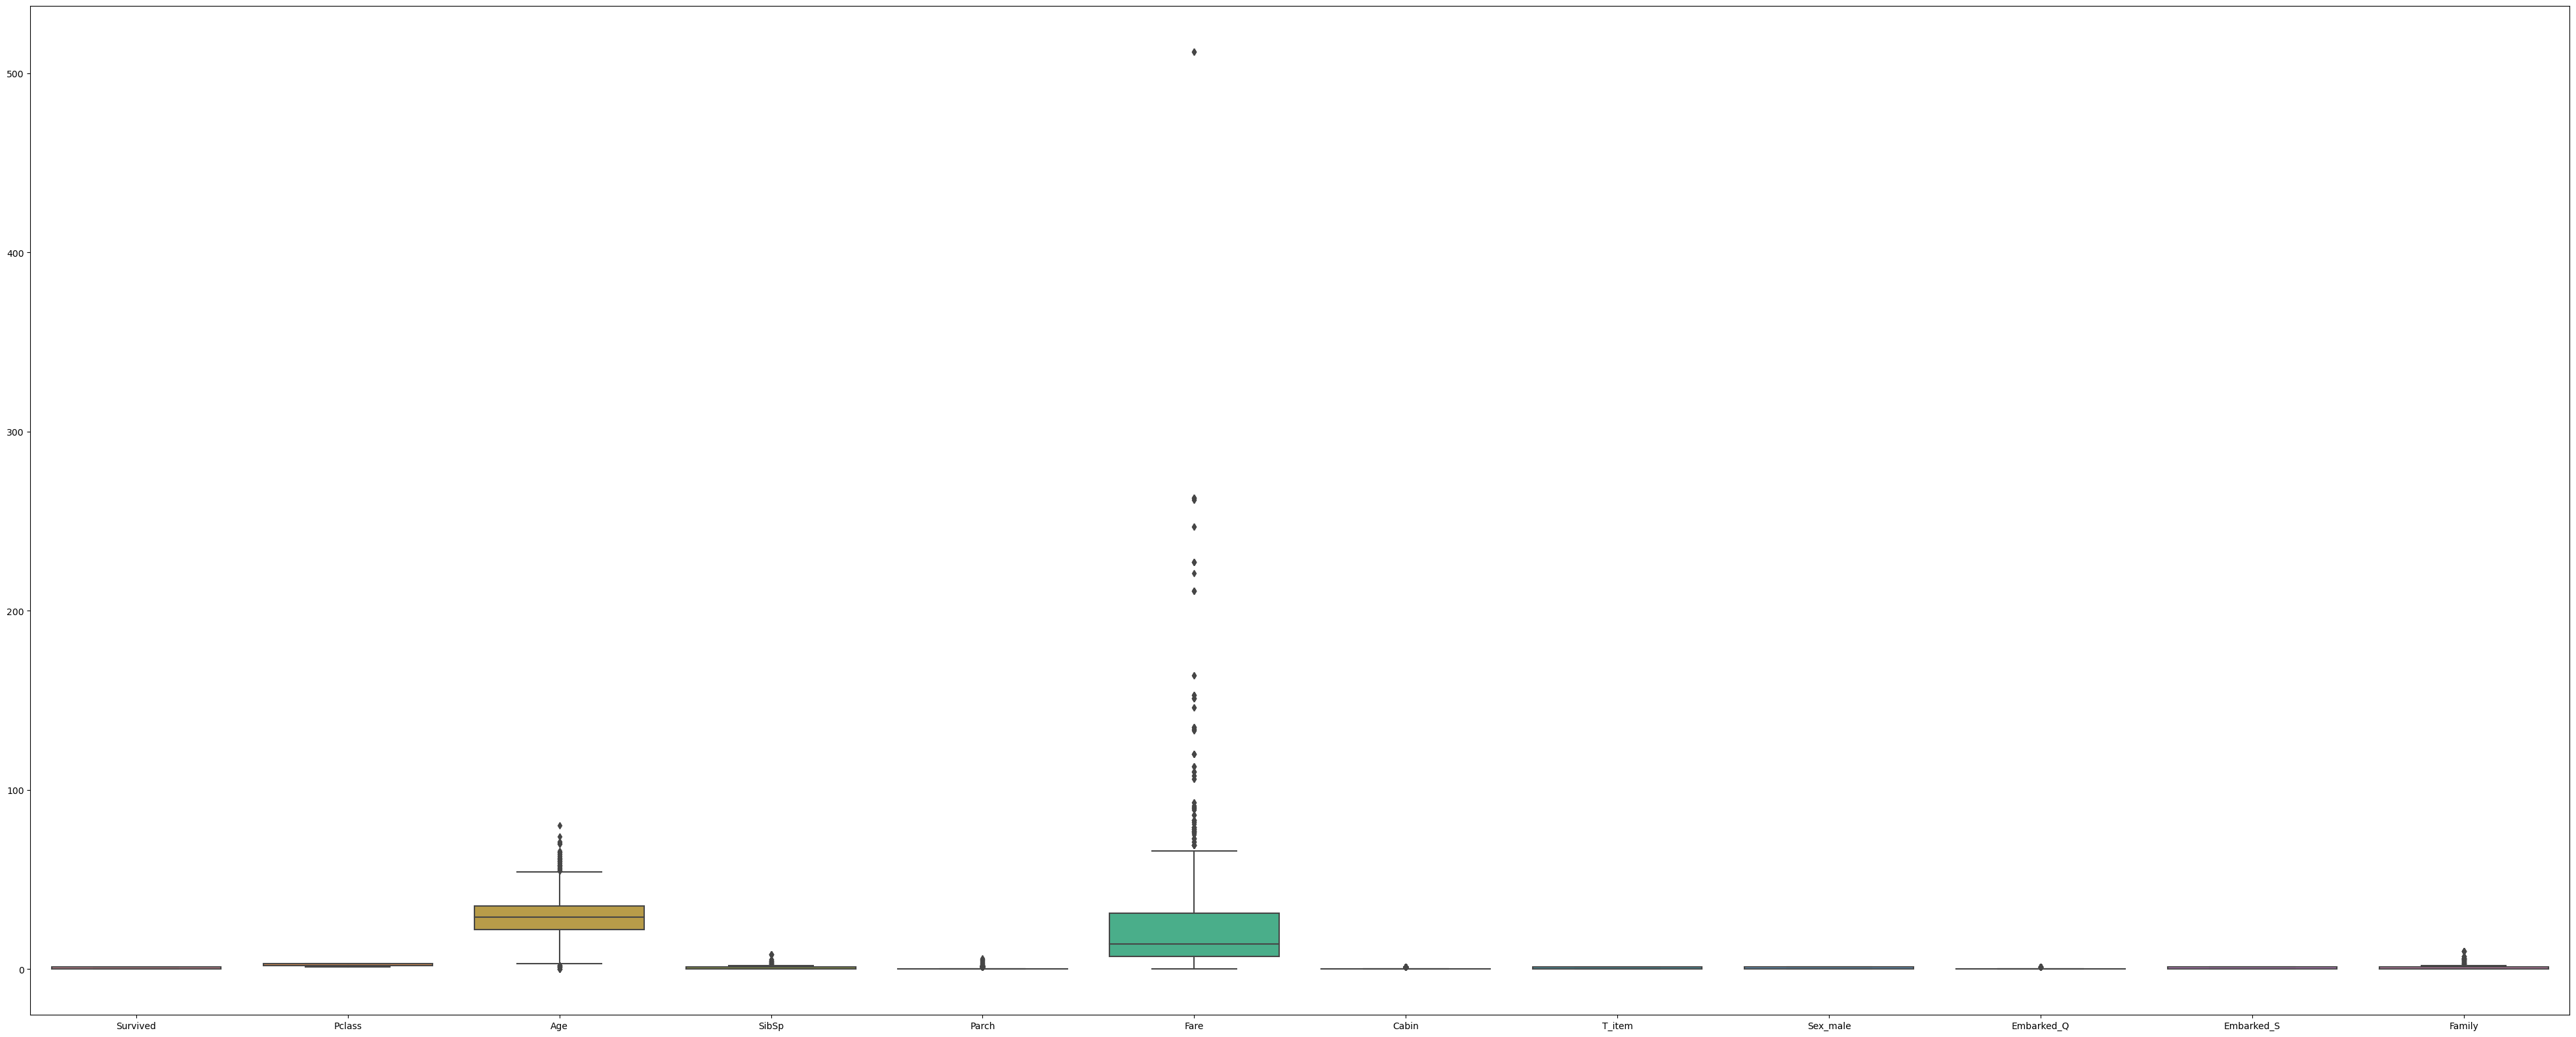

In [55]:
plt.figure(figsize=(50,20))
sns.boxplot(d)

In [56]:
d['Fare'].describe()

count    889.000000
mean      31.677165
std       49.706915
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [57]:
m=31+(1.5*(24))

In [58]:
m

67.0

In [60]:
len(d[d['Fare']>67])

112

<Axes: xlabel='Fare', ylabel='Density'>

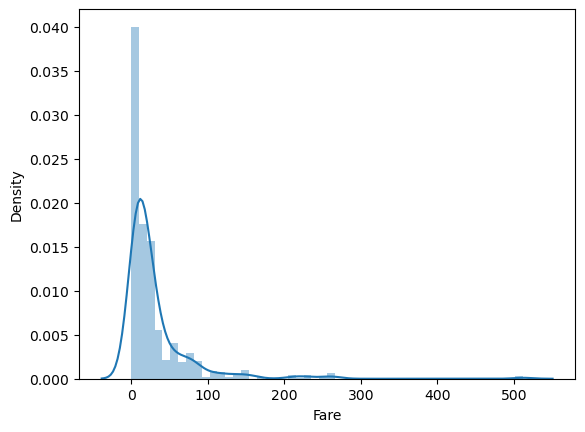

In [61]:
sns.distplot(d['Fare'])

In [62]:
len(d[d['Fare']>200])

20

In [68]:
d=d[d['Fare']<100]

In [69]:
d.shape

(836, 12)

<Axes: xlabel='Fare', ylabel='Density'>

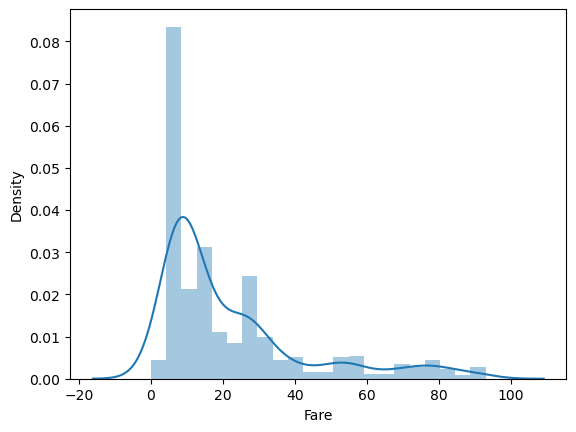

In [70]:
sns.distplot(d['Fare'])

In [71]:
d

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,T_item,Sex_male,Embarked_Q,Embarked_S,Family
0,0,3,22,1,0,7,0,1,1,0,1,1
1,1,1,38,1,0,71,1,1,0,0,0,1
2,1,3,26,0,0,7,0,1,0,0,1,0
3,1,1,35,1,0,53,1,0,0,0,1,1
4,0,3,35,0,0,8,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13,0,0,1,0,1,0
887,1,1,19,0,0,30,1,0,0,0,1,0
888,0,3,29,1,2,23,0,1,0,0,1,3
889,1,1,26,0,0,30,1,0,1,0,0,0


In [72]:
from sklearn.model_selection import train_test_split
X=d.drop(columns='Survived')
y=d['Survived']
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
X_train.shape

(668, 11)

In [74]:
X_val.shape

(168, 11)

In [75]:
X_train=s.fit_transform(X_train)

In [76]:
X_val=s.transform(X_val)

In [77]:
X_val

array([[ 0.77557541, -0.03339331, -0.47190622, ..., -0.32269526,
         0.6096419 , -0.54755336],
       [ 0.77557541, -0.03339331, -0.47190622, ..., -0.32269526,
         0.6096419 , -0.54755336],
       [ 0.77557541, -0.80793259, -0.47190622, ..., -0.32269526,
         0.6096419 , -0.54755336],
       ...,
       [ 0.77557541, -0.03339331, -0.47190622, ..., -0.32269526,
        -1.64030721, -0.54755336],
       [ 0.77557541,  0.19896847, -0.47190622, ..., -0.32269526,
         0.6096419 , -0.54755336],
       [ 0.77557541, -0.03339331, -0.47190622, ...,  3.09889893,
        -1.64030721, -0.54755336]])

<Axes: >

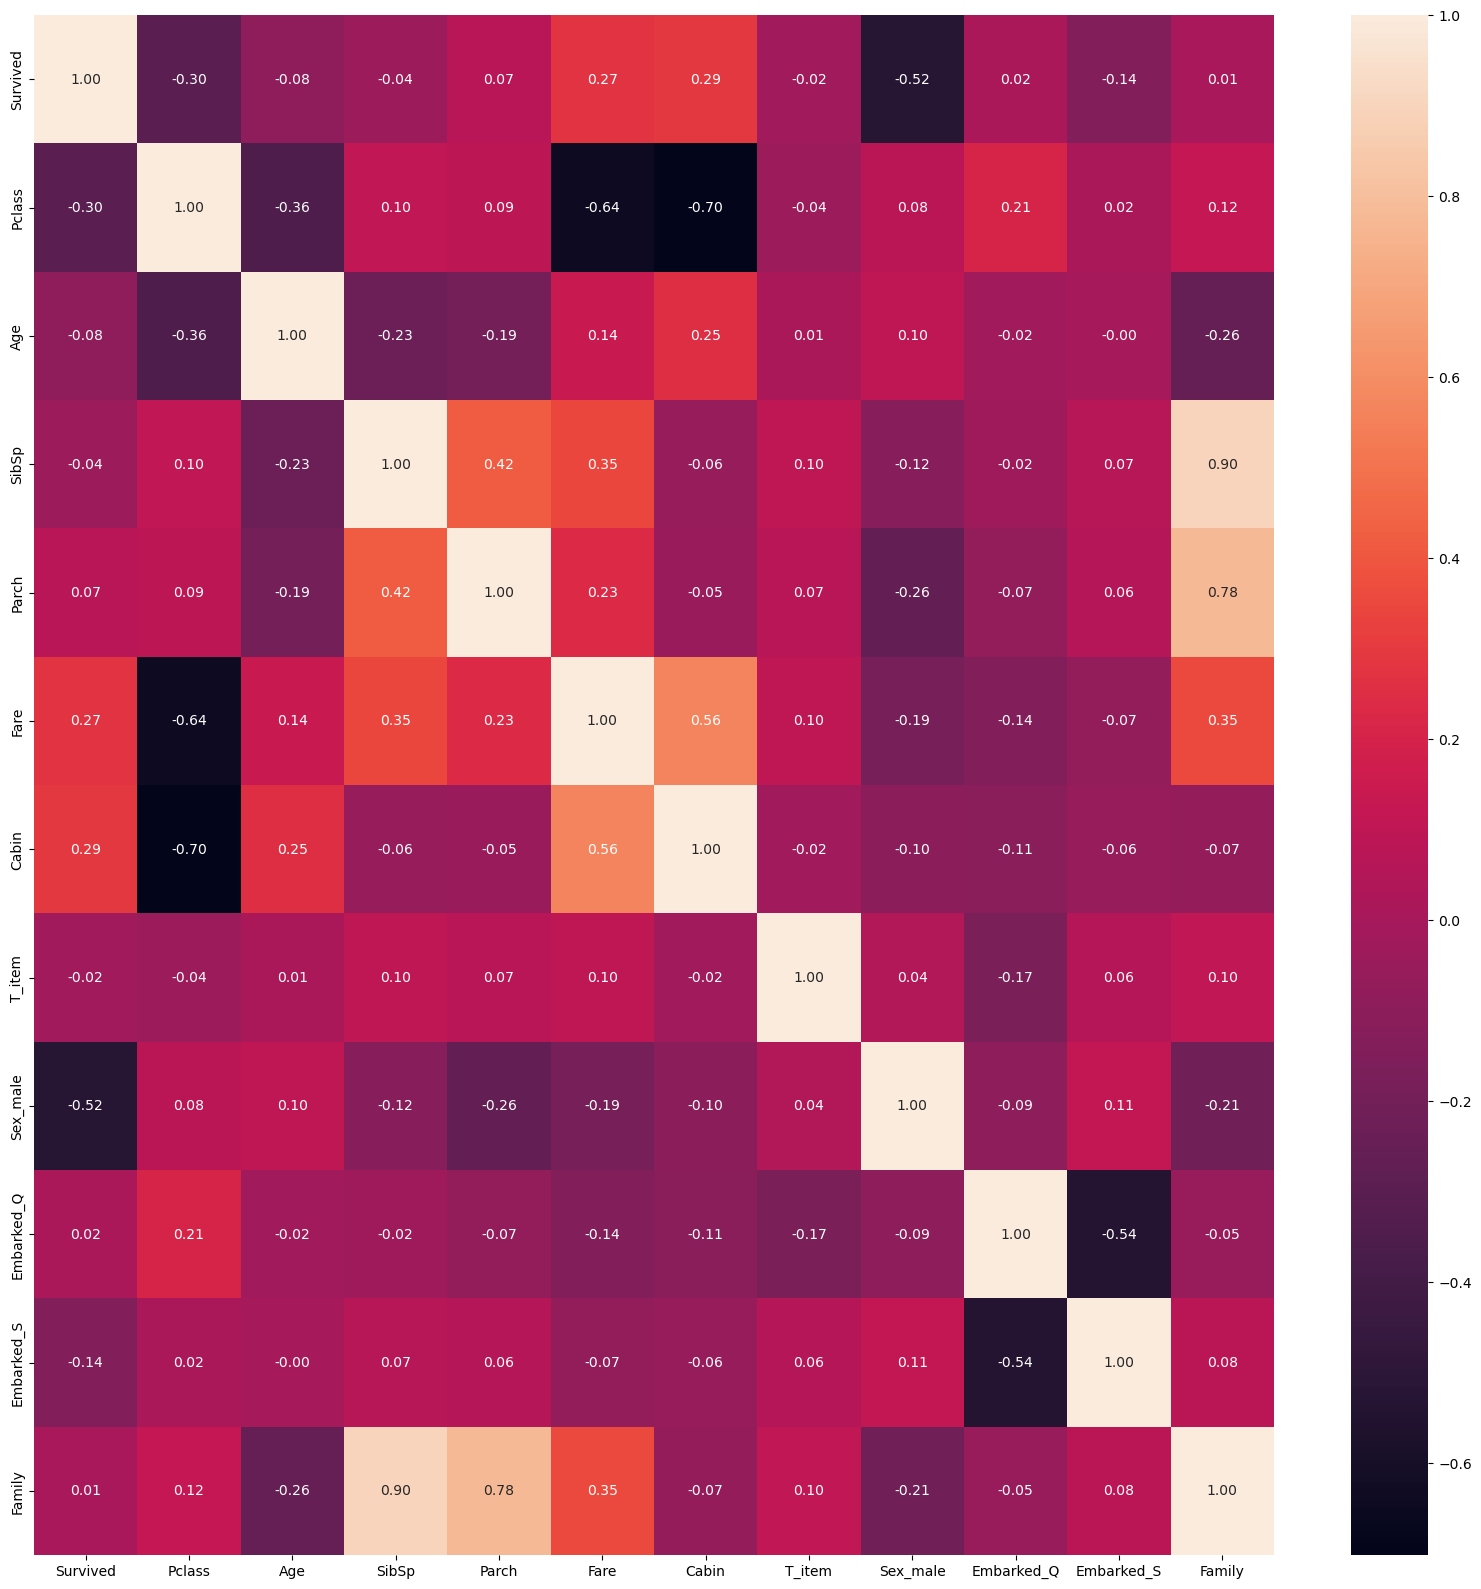

In [81]:
plt.figure(figsize=(20,20))
sns.heatmap(d.corr(),annot=True,fmt='0.2f')

In [82]:
#dataset=X_train,X_val,y_train,y_val

In [83]:
from xgboost import XGBClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [84]:
x=XGBClassifier()

In [86]:
p={'n_estimators':[10,50,100,120,500],'learning_rate':[0.0001,0.001,0.01,0.5,0.75,1],'max_depth':[1,10,15,None]}

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
g=GridSearchCV(x,p,cv=10,n_jobs=-1)

In [89]:
g.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.5, 0.75, 1],
                         'max_depth': [1, 10, 15, None],
                         'n_estimators': [10, 50, 100, 120, 500]})

In [90]:
g.best_params_

{'learning_rate': 0.5, 'max_depth': None, 'n_estimators': 10}

In [92]:
efs=ExhaustiveFeatureSelector(XGBClassifier(**g.best_params_),min_features=4,max_features=10,cv=10,n_jobs=-1)

In [93]:
efs.fit(X_train,y_train)

Features: 1815/1815

ExhaustiveFeatureSelector(cv=10,
                          estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learn...
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=10, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9], [10]],
                          max_features=10, min_features=4, n_jobs=-1)

In [94]:
efs.best_idx_

(0, 1, 4, 5, 7, 10)

In [95]:
efs.best_score_

0.8442333785617369

In [96]:
g.best_score_

0.8337630031659883

In [98]:
model=XGBClassifier(**g.best_params_)
model.fit(X_train[:,(0,1,4,5,7,10)],y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [99]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

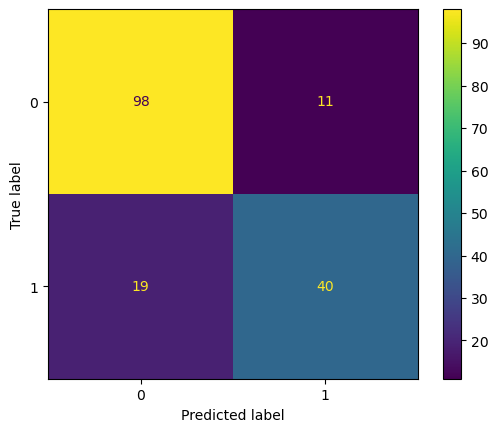

In [100]:
ConfusionMatrixDisplay(confusion_matrix(y_val,model.predict(X_val[:,(0,1,4,5,7,10)])),display_labels=model.classes_).plot()